## Imports

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import warnings
warnings.filterwarnings('ignore')

## Data

In [5]:
df = pd.read_csv('Walmart.csv')
df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667


In [6]:
## Describing data
df.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [8]:
## Checking for nul values
df.isnull().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

In [9]:
# convert date feature to datetime type
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')
df['Date']

0      2010-02-05
1      2010-02-12
2      2010-02-19
3      2010-02-26
4      2010-03-05
          ...    
6430   2012-09-28
6431   2012-10-05
6432   2012-10-12
6433   2012-10-19
6434   2012-10-26
Name: Date, Length: 6435, dtype: datetime64[ns]

In [10]:
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         6435 non-null   int64         
 1   Date          6435 non-null   datetime64[ns]
 2   Weekly_Sales  6435 non-null   float64       
 3   Holiday_Flag  6435 non-null   int64         
 4   Temperature   6435 non-null   float64       
 5   Fuel_Price    6435 non-null   float64       
 6   CPI           6435 non-null   float64       
 7   Unemployment  6435 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(2)
memory usage: 402.3 KB


In [12]:
# Checkpoint
data = df.copy()

In [13]:
# creating a seperate year, Month , day columns
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day

In [14]:
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month,Day
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106,2010,2,5
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106,2010,2,12
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,2010,2,19
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,2010,2,26
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106,2010,3,5


### Explainatory Data Analysis

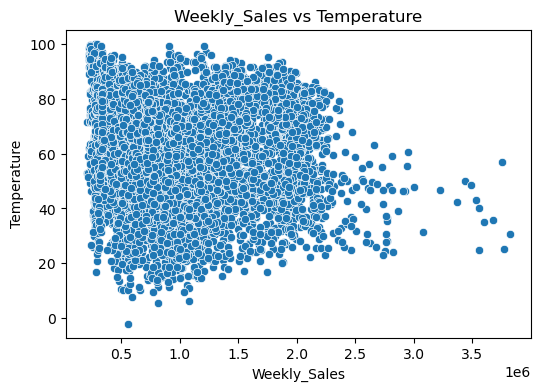

In [16]:
# Weekly_sales vs Temperature
plt.figure(figsize=(6,4))
sns.scatterplot(data=df, x='Weekly_Sales', y='Temperature')
plt.title('Weekly_Sales vs Temperature')
plt.show()

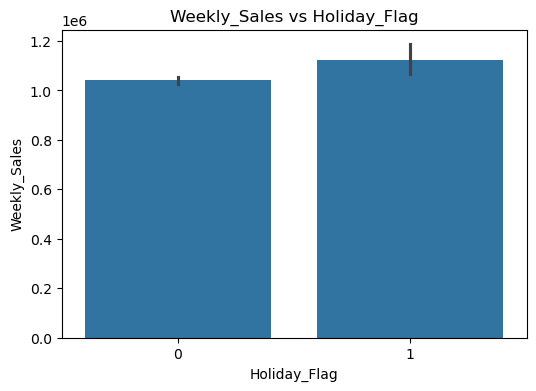

In [17]:
# Weekly_sales vs Holiday_flag
plt.figure(figsize=(6,4))
sns.barplot(data=df, y='Weekly_Sales', x='Holiday_Flag')
plt.title('Weekly_Sales vs Holiday_Flag')
plt.show()

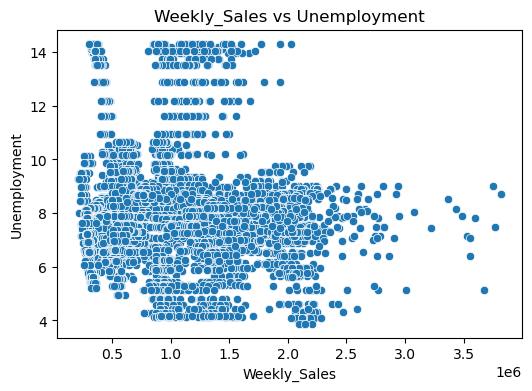

In [18]:
# Weekly_sales vs Unemployment
plt.figure(figsize=(6,4))
sns.scatterplot(data=df, x='Weekly_Sales', y='Unemployment')
plt.title('Weekly_Sales vs Unemployment')
plt.show()

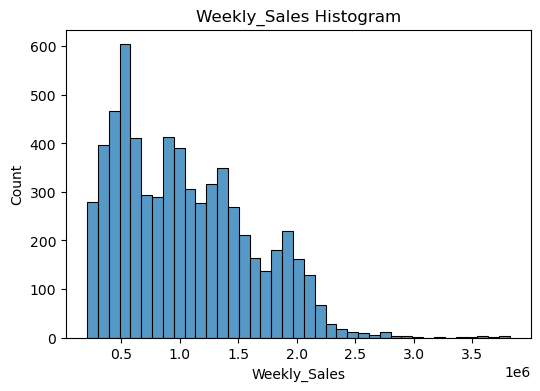

In [19]:
# Weekly_sales Histogram
plt.figure(figsize=(6,4))
sns.histplot(data=df, x='Weekly_Sales')
plt.title('Weekly_Sales Histogram')
plt.show()

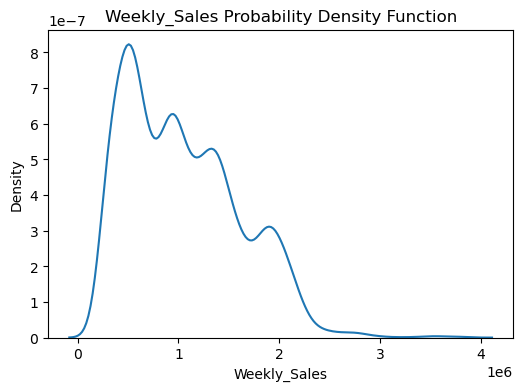

In [20]:
# probability density function of Weekly_sales
plt.figure(figsize=(6,4))
sns.kdeplot(data=df, x='Weekly_Sales')
plt.title('Weekly_Sales Probability Density Function')
plt.show()

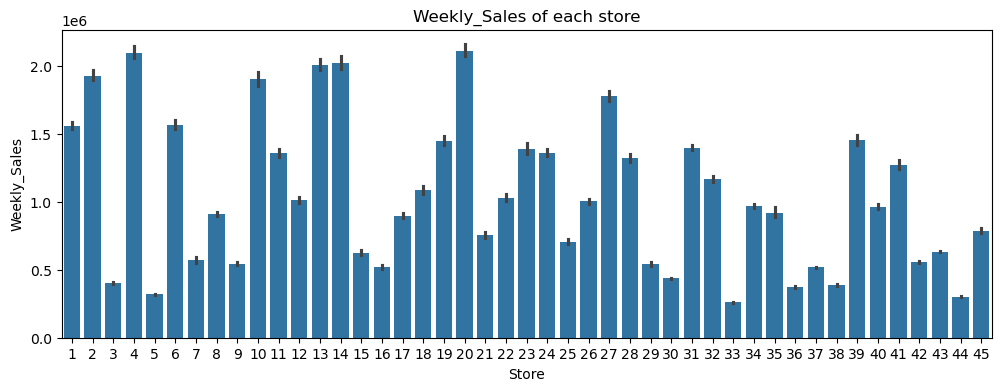

In [21]:
# Weekly_sales of each store
plt.figure(figsize=(12,4))
sns.barplot(data=df, y='Weekly_Sales', x='Store')
plt.title('Weekly_Sales of each store')
plt.show()

In [22]:
## Correlation of other features with Weekly Sales
df.corr()['Weekly_Sales'].sort_values(ascending=False)

Weekly_Sales    1.000000
Month           0.076143
Holiday_Flag    0.036891
Fuel_Price      0.009464
Date            0.006949
Day            -0.017409
Year           -0.018378
Temperature    -0.063810
CPI            -0.072634
Unemployment   -0.106176
Store          -0.335332
Name: Weekly_Sales, dtype: float64

In [23]:
## weekly sales by year
weekly_sales_by_year = df.groupby(['Year'])['Weekly_Sales'].sum().reset_index()
weekly_sales_by_year

,Year,Weekly_Sales
0,2010,2.288886e+09
1,2011,2.448200e+09
2,2012,2.000133e+09


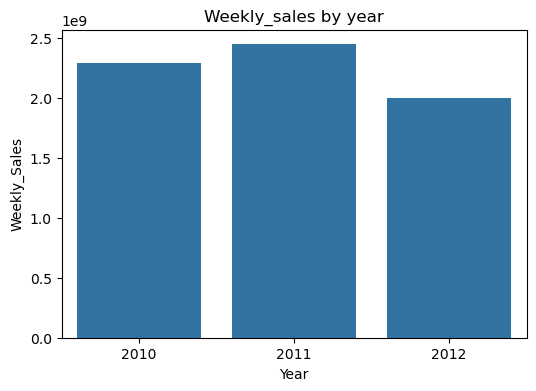

In [24]:
# Plotting Weekly_sales by year
plt.figure(figsize=(6,4))
sns.barplot(data=weekly_sales_by_year, x='Year', y='Weekly_Sales')
plt.title('Weekly_sales by year')
plt.show()

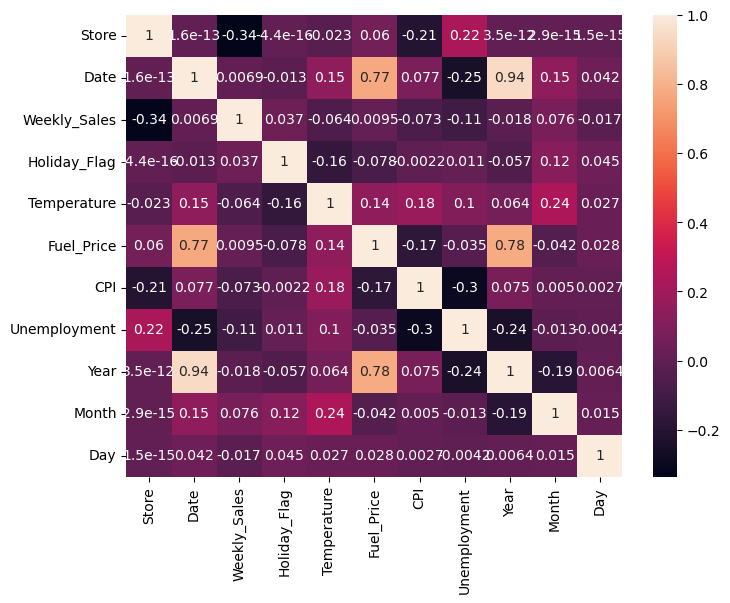

In [25]:
## Correlation Heatmap
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), annot=True)
plt.show()

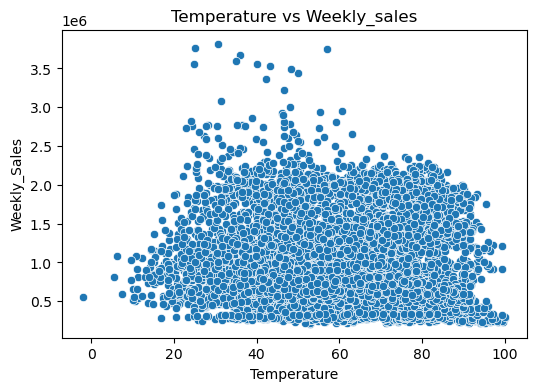

In [26]:
## Temperature vs Weekly_sales
plt.figure(figsize=(6,4))
sns.scatterplot(data=df, x='Temperature', y='Weekly_Sales')
plt.title('Temperature vs Weekly_sales')
plt.show()

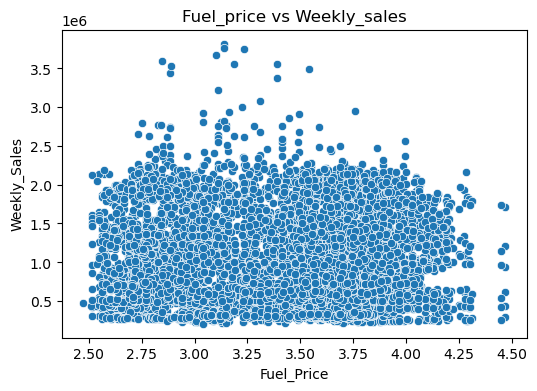

In [27]:
# Fuel_price vs Weekly_sales
plt.figure(figsize=(6,4))
sns.scatterplot(data=df, x='Fuel_Price', y='Weekly_Sales')
plt.title('Fuel_price vs Weekly_sales')
plt.show()

In [28]:
# creating unemployment rate bins in df dataframe
bins = [3,6,9,12,15]
labels = ['3-6', '6-9', '9-12', '12-15']
df['Unemployment_rate_bins'] = pd.cut(df['Unemployment'], bins=bins, labels=labels)
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month,Day,Unemployment_rate_bins
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106,2010,2,5,6-9
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106,2010,2,12,6-9
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,2010,2,19,6-9
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,2010,2,26,6-9
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106,2010,3,5,6-9


In [29]:
weekly_sales_by_unemployment_rate = df.groupby(['Unemployment_rate_bins'])['Weekly_Sales'].sum().reset_index()

In [30]:
weekly_sales_by_unemployment_rate

,Unemployment_rate_bins,Weekly_Sales
0,3-6,7.343351e+08
1,6-9,5.035896e+09
2,9-12,6.586257e+08
3,12-15,3.083625e+08


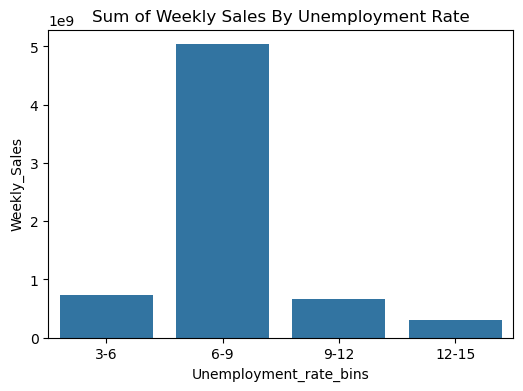

In [31]:
plt.figure(figsize=(6,4))
sns.barplot(weekly_sales_by_unemployment_rate, x='Unemployment_rate_bins', y='Weekly_Sales')
plt.title('Sum of Weekly Sales By Unemployment Rate')
plt.show()

In [32]:
# Sales by Year_Month
df['Year-Month']=df['Year'].astype(str) + '-' + df['Month'].astype(str)
df['Year-Month'].head()

0    2010-2
1    2010-2
2    2010-2
3    2010-2
4    2010-3
Name: Year-Month, dtype: object

In [33]:
# Sales by year month
sales_by_year_month = df.groupby(['Year-Month'])['Weekly_Sales'].sum().reset_index()
sales_by_year_month

,Year-Month,Weekly_Sales
0,2010-10,2.171618e+08
1,2010-11,2.028534e+08
2,2010-12,2.887605e+08
3,2010-2,1.903330e+08
4,2010-3,1.819198e+08
5,2010-4,2.314124e+08
6,2010-5,1.867109e+08
7,2010-6,1.922462e+08
8,2010-7,2.325801e+08
9,2010-8,1.876401e+08


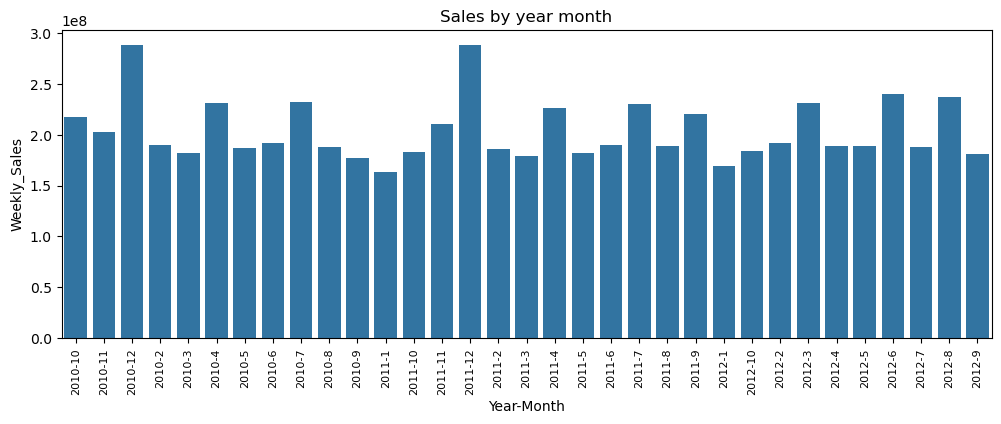

In [34]:
# Plot Sales vs year month
plt.figure(figsize=(12,4))
sns.barplot(data=sales_by_year_month, x='Year-Month', y='Weekly_Sales')
plt.title('Sales by year month')
plt.xticks(fontsize=8,rotation=90)
plt.show()

### If the weekly sales are affected by the unemployment rate, if yes - which stores are suffering the most?

In [36]:
df[['Weekly_Sales', 'Unemployment']].corr()

,Weekly_Sales,Unemployment
Weekly_Sales,1.000000,-0.106176
Unemployment,-0.106176,1.000000


##### Correlation is significantly negative suggesting that an increase in unemployment rate tends to decrease weekly sales.

In [38]:
# Group by Store and calculate correlation for each store
store_correlations = df.groupby('Store').apply(lambda x: x[['Weekly_Sales', 'Unemployment']].corr().iloc[0, 1])
store_correlations.sort_values()

Store
38   -0.785290
44   -0.780076
39   -0.384681
42   -0.356355
41   -0.350630
4    -0.337015
17   -0.263600
3    -0.230413
37   -0.221287
5    -0.207043
43   -0.201954
9    -0.191534
13   -0.171633
7    -0.165382
40   -0.112528
32   -0.099455
1    -0.097955
20   -0.095341
23   -0.077169
16   -0.070864
26   -0.066899
31   -0.064738
8    -0.052580
11   -0.020339
27   -0.014275
24   -0.012261
12   -0.009286
25   -0.004958
45   -0.004041
34    0.017010
22    0.039043
6     0.044251
2     0.066325
15    0.078905
29    0.084682
33    0.101175
19    0.101464
10    0.131908
28    0.136671
18    0.139179
30    0.201862
14    0.210786
21    0.218367
35    0.483865
36    0.833734
dtype: float64

##### More negative correlation suggests the store's sales drop more as unemployment increases.

In [40]:
# Top 10 suffering stores based on unemployment rate
top_10_stores = store_correlations.sort_values().head(10)
top_10_stores

Store
38   -0.785290
44   -0.780076
39   -0.384681
42   -0.356355
41   -0.350630
4    -0.337015
17   -0.263600
3    -0.230413
37   -0.221287
5    -0.207043
dtype: float64

##### The top most suffering stores due to unemployment rate are store numbers as follows: 38, 44, 39, 42, 41 4, 17, 3, 37, 5

### If the weekly sales show a seasonal trend, when and what could be the reason?

In [43]:
# Aggregate weekly_sales
weekly_sales = df.groupby('Date')['Weekly_Sales'].sum().reset_index()
weekly_sales.set_index('Date', inplace=True)
weekly_sales

,Weekly_Sales
Date,
2010-02-05,49750740.50
2010-02-12,48336677.63
2010-02-19,48276993.78
2010-02-26,43968571.13
2010-03-05,46871470.30
...,...
2012-09-28,43734899.40
2012-10-05,47566639.31
2012-10-12,46128514.25


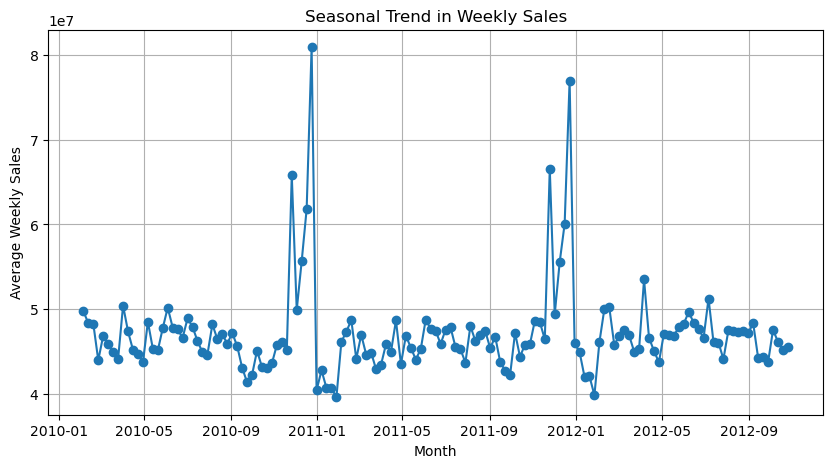

In [44]:
# Plot the seasonal trend
plt.figure(figsize=(10, 5))
plt.plot(weekly_sales.index, weekly_sales.values, marker='o', linestyle='-')
plt.xlabel("Month")
plt.ylabel("Average Weekly Sales")
plt.title("Seasonal Trend in Weekly Sales")
#plt.xticks(range(1, 13))  # Set x-axis from Jan (1) to Dec (12)
plt.grid()
plt.show()

In [45]:
weekly_sales.sort_values(by='Weekly_Sales', ascending=False).head(10)

,Weekly_Sales
Date,
2010-12-24,80931415.60
2011-12-23,76998241.31
2011-11-25,66593605.26
2010-11-26,65821003.24
2010-12-17,61820799.85
2011-12-16,60085695.94
2010-12-10,55666770.39
2011-12-09,55561147.70
2012-04-06,53502315.87


### Insights from season trend in Weekly Sales.


*   There are two significant peaks around last weeks of December both in 2010 & 2011. These indicate notable events or changes during these periods. It's likely due to shopping during Christmas and new year's eve.
*   Aside from the spikes, the data generally fluctuates between a particular range, suggesting a stable trend with minor variations throughout the observed period.
*   The regularity of the spikes suggests a possible seasonal or annual event impacting the data around late November & December each year.

### Does temperature affect the weekly sales in any manner?

In [48]:
df[['Weekly_Sales', 'Temperature']].corr()

,Weekly_Sales,Temperature
Weekly_Sales,1.00000,-0.06381
Temperature,-0.06381,1.00000


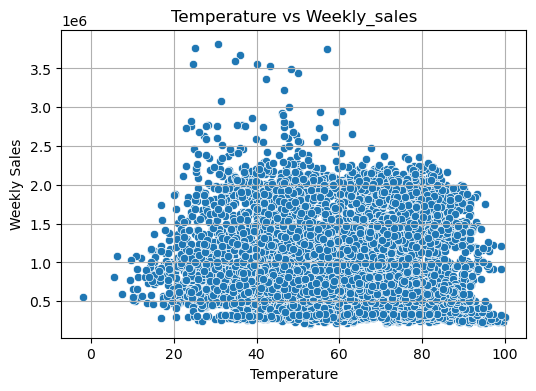

In [49]:
# Temperature vs Weekly_sales
plt.figure(figsize=(6,4))
sns.scatterplot(data=df, x='Temperature', y='Weekly_Sales')
plt.title('Temperature vs Weekly_sales')
plt.xlabel("Temperature")
plt.ylabel("Weekly Sales")
plt.grid(True)
plt.show()

### Insights from Weekly Sales vs Temperature

*   Most data points fall within the temperature range of 20 to 80 degrees, indicating that this is the typical temperature range for Weekle Sales Data.
*   There is a significant dense concentration of sales at temperatures between 20 to 60 degrees, suggesting that this temperature range is optimal for higher sales.
*   Temperature increases beyond 60 degrees, the density of higher sales data points decreases indicating that higher temperatures negatively impacts weekly sales.
*   There are fewer data points at extreme temperatures (below 20 degrees and above 80 degrees). These temperatures are less relevant for weekly sales.
*   The scatter plot does not show a clear linear relationship between temperature and weekly sales, indicating that other factors might influence sales.

### How is the Consumer Price index affecting the weekly sales of various stores?

In [52]:
# Correlation between Weekly Sales and CPI
df[['Weekly_Sales', 'CPI']].corr()

,Weekly_Sales,CPI
Weekly_Sales,1.000000,-0.072634
CPI,-0.072634,1.000000



*  Negative correlation: Increase in CPI leads to lower weekly sales.




In [54]:
# CPI impact per store
store_corr = df.groupby('Store').apply(lambda x: x[['Weekly_Sales', 'CPI']].corr().iloc[0,1])
store_corr

Store
1     0.225408
2    -0.062431
3     0.317250
4     0.351157
5     0.308261
6    -0.011357
7     0.289044
8     0.120255
9     0.294805
10   -0.115374
11    0.069781
12    0.084087
13    0.163976
14   -0.419755
15   -0.174467
16    0.124285
17    0.348571
18   -0.193541
19   -0.155341
20    0.058706
21   -0.163649
22   -0.038602
23    0.084248
24   -0.013684
25   -0.010914
26    0.131980
27   -0.213082
28   -0.095908
29   -0.072530
30   -0.298188
31    0.132887
32    0.196782
33   -0.052271
34    0.115437
35   -0.424107
36   -0.915095
37    0.244507
38    0.812837
39    0.428043
40    0.113318
41    0.392293
42    0.360859
43   -0.285686
44    0.740150
45   -0.023548
dtype: float64

In [55]:
store_corr.sort_values()

Store
36   -0.915095
35   -0.424107
14   -0.419755
30   -0.298188
43   -0.285686
27   -0.213082
18   -0.193541
15   -0.174467
21   -0.163649
19   -0.155341
10   -0.115374
28   -0.095908
29   -0.072530
2    -0.062431
33   -0.052271
22   -0.038602
45   -0.023548
24   -0.013684
6    -0.011357
25   -0.010914
20    0.058706
11    0.069781
12    0.084087
23    0.084248
40    0.113318
34    0.115437
8     0.120255
16    0.124285
26    0.131980
31    0.132887
13    0.163976
32    0.196782
1     0.225408
37    0.244507
7     0.289044
9     0.294805
5     0.308261
3     0.317250
17    0.348571
4     0.351157
42    0.360859
41    0.392293
39    0.428043
44    0.740150
38    0.812837
dtype: float64

In [56]:
# Most Affected Stores
most_affected_stores = store_corr.sort_values().head(10)
most_affected_stores

Store
36   -0.915095
35   -0.424107
14   -0.419755
30   -0.298188
43   -0.285686
27   -0.213082
18   -0.193541
15   -0.174467
21   -0.163649
19   -0.155341
dtype: float64

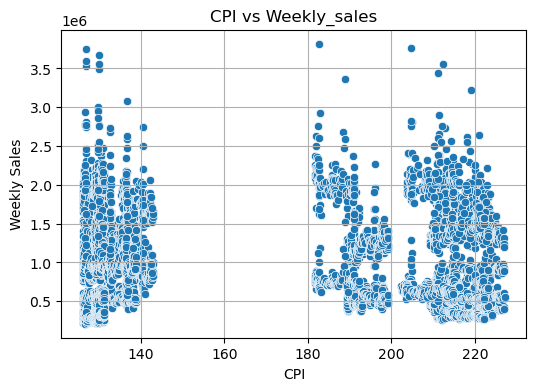

In [57]:
# Visualize CPI vs Weekly_sales Relationship
plt.figure(figsize=(6,4))
sns.scatterplot(data=df, x='CPI', y='Weekly_Sales')
plt.title('CPI vs Weekly_sales')
plt.xlabel("CPI")
plt.ylabel("Weekly Sales")
plt.grid(True)
plt.show()

Insights from CPI vs Weekly_Sales

*   The data points are grouped into three distinct clusters based on CPI values: around 130-150, 180-200, and 210-230. This suggests that certain CPI ranges have different sales patterns.
*   **First Cluster (CPI 130-150)**: Weekly sales range from 500K to 3.5 Million, with a higher density between 500K and 2.5 Million.
*   **Second Cluster (CPI 180-200):** Weekly sales range from 500K to 2.5 Million, with a higher density between 500K and 1.5 Million.
*   **Third Cluster (CPI 210-230)**: Weekly sales range from 500K to 2.5 Million, with a higher density between 500K and 1.5 Million.
*   The data points are widely scattered within each cluster, suggesting there is no clear linear relationship between CPI and Weekly Sales.




### Top performing stores according to the historical data.

In [60]:
# Total and average sales per store
store_performance = df.groupby('Store')['Weekly_Sales'].agg(['sum', 'mean']).reset_index()
store_performance.columns = ['Store', 'Total_Sales', 'Average_Weekly_Sales']
store_performance.sort_values(by='Total_Sales', ascending=False)

,Store,Total_Sales,Average_Weekly_Sales
19,20,3.013978e+08,2.107677e+06
3,4,2.995440e+08,2.094713e+06
13,14,2.889999e+08,2.020978e+06
12,13,2.865177e+08,2.003620e+06
1,2,2.753824e+08,1.925751e+06
9,10,2.716177e+08,1.899425e+06
26,27,2.538559e+08,1.775216e+06
5,6,2.237561e+08,1.564728e+06
0,1,2.224028e+08,1.555264e+06
38,39,2.074455e+08,1.450668e+06


In [61]:
# Standard deviation of weekly sales of each store
store_performance['Sales_Stability'] = df.groupby('Store')['Weekly_Sales'].std().reset_index(drop=True)
store_performance

,Store,Total_Sales,Average_Weekly_Sales,Sales_Stability
0,1,2.224028e+08,1.555264e+06,155980.767761
1,2,2.753824e+08,1.925751e+06,237683.694682
2,3,5.758674e+07,4.027044e+05,46319.631557
3,4,2.995440e+08,2.094713e+06,266201.442297
4,5,4.547569e+07,3.180118e+05,37737.965745
5,6,2.237561e+08,1.564728e+06,212525.855862
6,7,8.159828e+07,5.706173e+05,112585.469220
7,8,1.299512e+08,9.087495e+05,106280.829881
8,9,7.778922e+07,5.439806e+05,69028.666585
9,10,2.716177e+08,1.899425e+06,302262.062504


In [62]:
top_stores = store_performance.sort_values(by='Sales_Stability')
top_stores.head(10)

,Store,Total_Sales,Average_Weekly_Sales,Sales_Stability
36,37,74202740.32,518900.281958,21837.461190
29,30,62716885.12,438579.616224,22809.665590
32,33,37160221.96,259861.692028,24132.927322
43,44,43293087.84,302748.866014,24762.832015
4,5,45475688.90,318011.810490,37737.965745
42,43,90565435.41,633324.723147,40598.413260
37,38,55159626.42,385731.653287,42768.169450
2,3,57586735.07,402704.441049,46319.631557
41,42,79565752.43,556403.863147,50262.925530
35,36,53412214.97,373511.992797,60725.173579


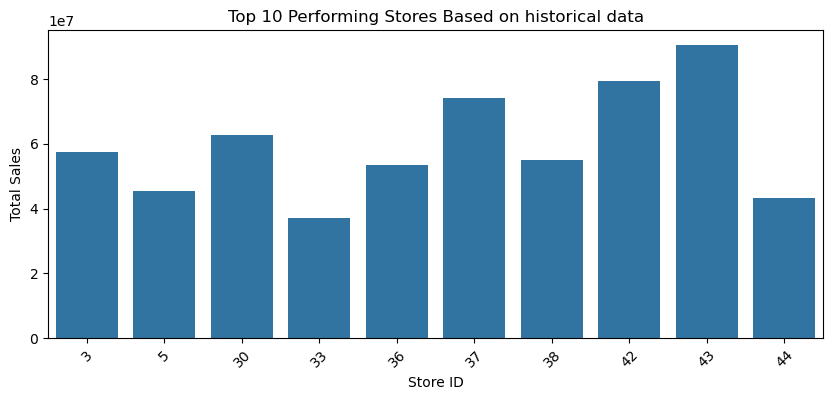

In [63]:
top10 = top_stores.head(10)

# Visualise the top10 stores
plt.figure(figsize=(10,4))
sns.barplot(data=top10, x='Store', y='Total_Sales')
plt.xlabel("Store ID")
plt.ylabel("Total Sales")
plt.title("Top 10 Performing Stores Based on historical data")
plt.xticks(rotation=45)
plt.show()

### The worst performing store, and how significant is the difference between the highest and lowest performing stores

In [65]:
# Finding the best and worst performing stores
best = store_performance.loc[store_performance['Total_Sales'].idxmax()]
worst = store_performance.loc[store_performance['Total_Sales'].idxmin()]

In [66]:
print("Best Performing Store:")
print(best)
print("\nWorst Performing Store:")
print(worst)

Best Performing Store:
Store                   2.000000e+01
Total_Sales             3.013978e+08
Average_Weekly_Sales    2.107677e+06
Sales_Stability         2.759006e+05
Name: 19, dtype: float64

Worst Performing Store:
Store                   3.300000e+01
Total_Sales             3.716022e+07
Average_Weekly_Sales    2.598617e+05
Sales_Stability         2.413293e+04
Name: 32, dtype: float64


In [67]:
# sales difference & percentage difference in total sales
sales_difference = best['Total_Sales'] - worst['Total_Sales']
percentage_difference = (sales_difference / best['Total_Sales']) * 100

In [68]:
sales_difference

264237570.49999997

In [69]:
percentage_difference

87.67070533042084

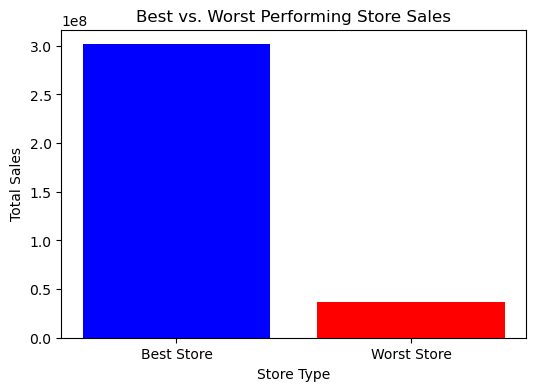

In [70]:
stores = ['Best Store', 'Worst Store']
sales = [best['Total_Sales'], worst['Total_Sales']]

plt.figure(figsize=(6,4))
plt.bar(stores, sales, color=['blue', 'red'])
plt.xlabel("Store Type")
plt.ylabel("Total Sales")
plt.title("Best vs. Worst Performing Store Sales")
plt.show()

In [71]:
df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month,Day,Unemployment_rate_bins,Year-Month
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106,2010,2,5,6-9,2010-2
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106,2010,2,12,6-9,2010-2
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,2010,2,19,6-9,2010-2
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,2010,2,26,6-9,2010-2
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106,2010,3,5,6-9,2010-3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6430,45,2012-09-28,713173.95,0,64.88,3.997,192.013558,8.684,2012,9,28,6-9,2012-9
6431,45,2012-10-05,733455.07,0,64.89,3.985,192.170412,8.667,2012,10,5,6-9,2012-10
6432,45,2012-10-12,734464.36,0,54.47,4.000,192.327265,8.667,2012,10,12,6-9,2012-10
6433,45,2012-10-19,718125.53,0,56.47,3.969,192.330854,8.667,2012,10,19,6-9,2012-10


In [72]:
df.columns

Index(['Store', 'Date', 'Weekly_Sales', 'Holiday_Flag', 'Temperature',
       'Fuel_Price', 'CPI', 'Unemployment', 'Year', 'Month', 'Day',
       'Unemployment_rate_bins', 'Year-Month'],
      dtype='object')

In [73]:
data

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,2012-09-28,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,2012-10-05,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,2012-10-12,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,2012-10-19,718125.53,0,56.47,3.969,192.330854,8.667


In [74]:
data['Date'].nunique()

143

In [75]:
data.set_index('Date', inplace=True)
data.head()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
Date,,,,,,,
2010-02-05,1,1643690.90,0,42.31,2.572,211.096358,8.106
2010-02-12,1,1641957.44,1,38.51,2.548,211.242170,8.106
2010-02-19,1,1611968.17,0,39.93,2.514,211.289143,8.106
2010-02-26,1,1409727.59,0,46.63,2.561,211.319643,8.106
2010-03-05,1,1554806.68,0,46.50,2.625,211.350143,8.106


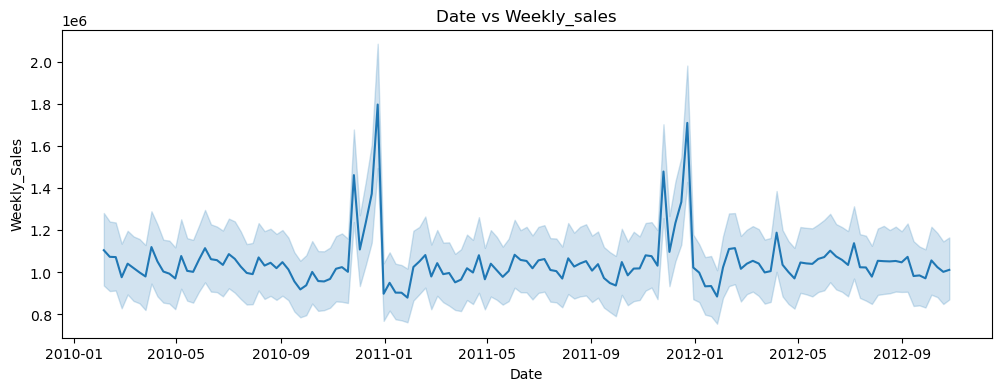

In [76]:
# Plotting Date vs Weekly_sales
plt.figure(figsize=(12,4))
sns.lineplot(data=data, x=data.index, y='Weekly_Sales')
plt.title('Date vs Weekly_sales')
plt.show()

In [77]:
# Total sales by date
total_sales_by_date = df.groupby(['Date'])['Weekly_Sales'].sum().reset_index()
total_sales_by_date.set_index('Date', inplace=True)
total_sales_by_date

,Weekly_Sales
Date,
2010-02-05,49750740.50
2010-02-12,48336677.63
2010-02-19,48276993.78
2010-02-26,43968571.13
2010-03-05,46871470.30
...,...
2012-09-28,43734899.40
2012-10-05,47566639.31
2012-10-12,46128514.25


<Axes: xlabel='Date'>

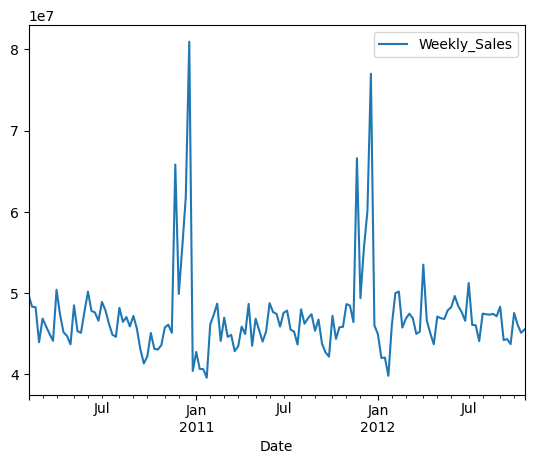

In [78]:
total_sales_by_date.plot()

In [79]:
## seasonal decompose
from statsmodels.tsa.seasonal import seasonal_decompose
decomposed = seasonal_decompose(total_sales_by_date, period=12)


In [80]:
trend = decomposed.trend
season = decomposed.seasonal
residual = decomposed.resid

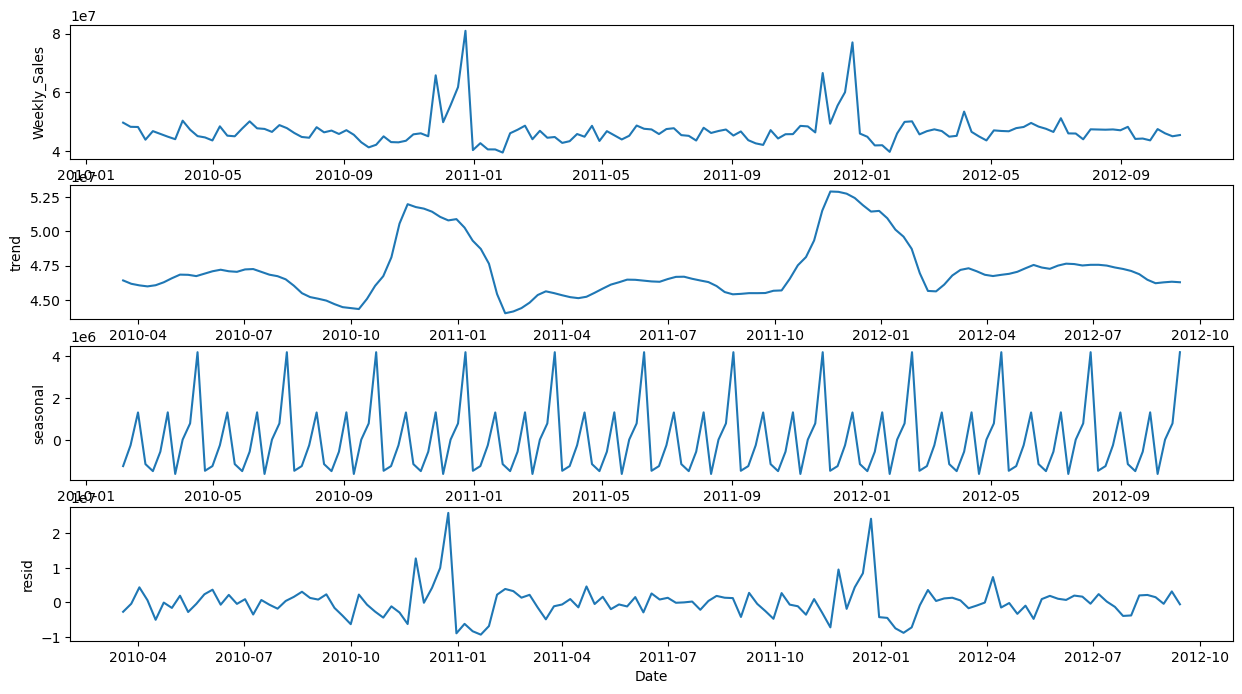

In [81]:
plt.figure(figsize=(15,8))

plt.subplot(411)
sns.lineplot(total_sales_by_date['Weekly_Sales'])

plt.subplot(412)
sns.lineplot(trend)

plt.subplot(413)
sns.lineplot(season)


plt.subplot(414)
sns.lineplot(residual)

plt.show()

In [82]:
# ADFuller test
from statsmodels.tsa.stattools import adfuller


In [83]:
result = adfuller(total_sales_by_date)
print('ADF Statistic:', result[0])
print('p-value:', result[1])

ADF Statistic: -5.908297957186335
p-value: 2.675979158986003e-07



### Null Hypothesis - data is not stationary
### Alternate Hypothesis - data is stationary

In [85]:
if result[1] <= 0.05:
    print("Reject the null hypothesis (H0): The series is stationary.")
else:
    print("Fail to reject the null hypothesis (H0): The series is non-stationary.")


Reject the null hypothesis (H0): The series is stationary.


In [86]:
# Plotting ACF & PACF
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

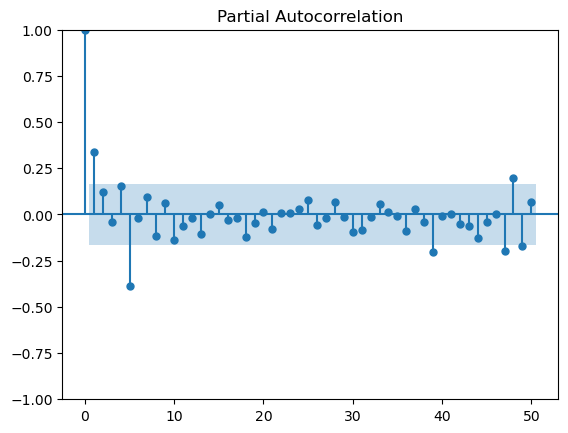

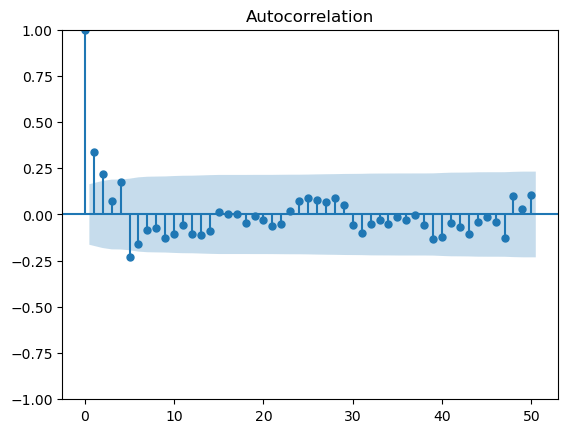

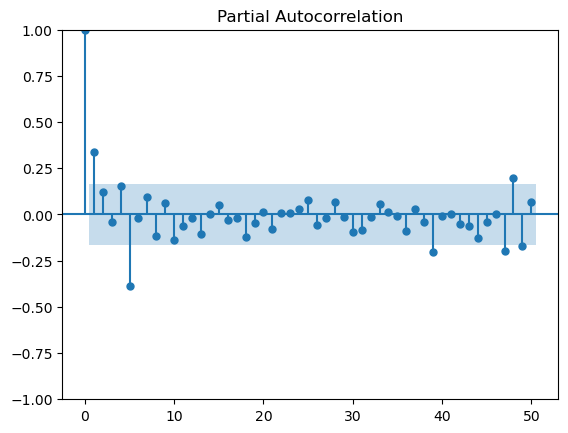

In [87]:
plot_acf(total_sales_by_date['Weekly_Sales'], lags=50)

plot_pacf(total_sales_by_date['Weekly_Sales'], lags=50)

## Train Test Split

In [89]:
total_sales_by_date.shape

(143, 1)

In [90]:
x_train = total_sales_by_date.iloc[:100]
x_test = total_sales_by_date.iloc[100:]

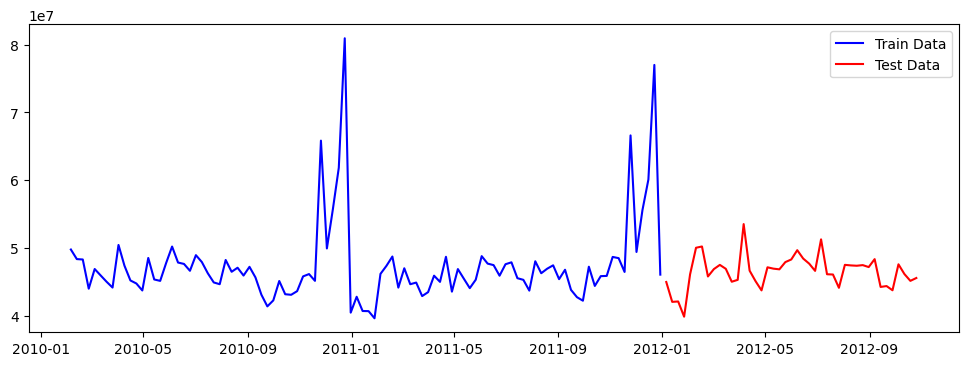

In [91]:
## plotting train and test data
plt.figure(figsize=(12,4))
plt.plot(x_train, label='Train Data', color='blue')
plt.plot(x_test, label='Test Data', color='red')
plt.legend()
plt.show()

In [92]:
!pip install pmdarima

### ARIMA Model

In [94]:
from statsmodels.tsa.arima.model import ARIMA

In [95]:
from pmdarima import auto_arima

In [96]:
auto_model = auto_arima(x_train['Weekly_Sales'], seasonal=True, trace=True)
print("Best order (p, d, q):", auto_model.order)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=3407.890, Time=0.55 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=3418.054, Time=0.06 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=3408.386, Time=0.06 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=3412.115, Time=0.06 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=3822.228, Time=0.05 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=3411.530, Time=0.16 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=3409.356, Time=0.18 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=3409.297, Time=0.50 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=3405.640, Time=0.45 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=3412.152, Time=0.21 sec
 ARIMA(3,0,3)(0,0,0)[0] intercept   : AIC=3400.932, Time=0.63 sec
 ARIMA(4,0,3)(0,0,0)[0] intercept   : AIC=3397.991, Time=0.81 sec
 ARIMA(4,0,2)(0,0,0)[0] intercept   : AIC=3396.237, Time=0.52 sec
 ARIMA(4,0,1)(0,0,0)[0] intercept   : AIC=3403.001, Time=0.30 sec
 ARIMA(5,0,2)(0,0,0)[0] intercept

In [97]:
model = ARIMA(x_train['Weekly_Sales'], order=auto_model.order)
model = model.fit()

C:\Users\hp5cd\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
C:\Users\hp5cd\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
C:\Users\hp5cd\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)


In [98]:
new_data = total_sales_by_date
new_data['Arima_Predicted'] = model.predict(start=len(x_train), end =len(x_train)+len(x_test)-1)
new_data

,Weekly_Sales,Arima_Predicted
Date,,
2010-02-05,49750740.50,NaN
2010-02-12,48336677.63,NaN
2010-02-19,48276993.78,NaN
2010-02-26,43968571.13,NaN
2010-03-05,46871470.30,NaN
...,...,...
2012-09-28,43734899.40,4.752299e+07
2012-10-05,47566639.31,4.722740e+07
2012-10-12,46128514.25,4.747397e+07


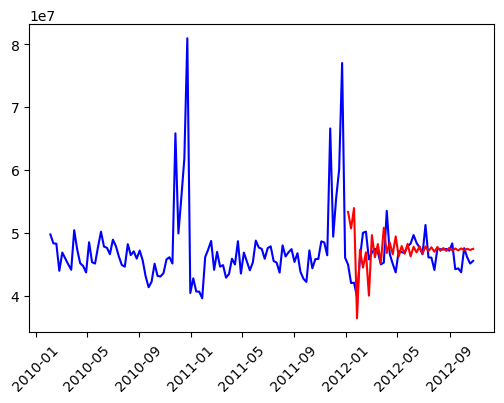

In [99]:
plt.figure(figsize=(6,4)) 

plt.plot( new_data['Weekly_Sales'], color='blue')
plt.plot( new_data['Arima_Predicted'], color='red')
plt.xticks(rotation=45)
plt.show()

In [100]:
forecast = model.forecast(steps=55)
print("Forecasted Weekly Sales for the next 12 weeks:")
print(forecast.tail(12))

Forecasted Weekly Sales for the next 12 weeks:
2012-11-02    4.727540e+07
2012-11-09    4.745051e+07
2012-11-16    4.730759e+07
2012-11-23    4.743546e+07
2012-11-30    4.730788e+07
2012-12-07    4.742768e+07
2012-12-14    4.732504e+07
2012-12-21    4.741270e+07
2012-12-28    4.732902e+07
2013-01-04    4.740954e+07
2013-01-11    4.733763e+07
2013-01-18    4.739916e+07
Freq: W-FRI, Name: predicted_mean, dtype: float64


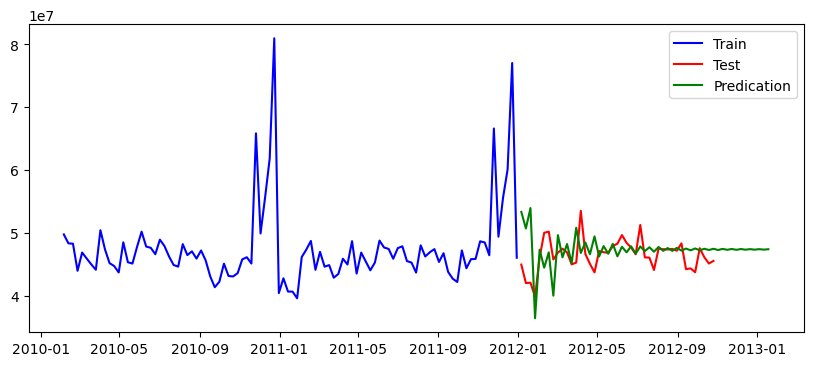

In [101]:
plt.figure(figsize=(10,4))
plt.plot(x_train,color='blue',label='Train')
plt.plot(x_test,color='red',label='Test')
plt.plot(forecast,color='green',label='Predication')
plt.legend(loc='best')
plt.show()

### SARIMAX Model

In [103]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [104]:
model = SARIMAX(x_train['Weekly_Sales'], order=auto_model.order, seasonal_order=(5,0,0,52))
model = model.fit()

C:\Users\hp5cd\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
C:\Users\hp5cd\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)


In [106]:
new_data['Sarima_Predicted'] = model.predict(start=len(x_train), end =len(x_train)+len(x_test)-1)
new_data

,Weekly_Sales,Arima_Predicted,Sarima_Predicted
Date,,,
2010-02-05,49750740.50,NaN,NaN
2010-02-12,48336677.63,NaN,NaN
2010-02-19,48276993.78,NaN,NaN
2010-02-26,43968571.13,NaN,NaN
2010-03-05,46871470.30,NaN,NaN
...,...,...,...
2012-09-28,43734899.40,4.752299e+07,4.260195e+07
2012-10-05,47566639.31,4.722740e+07,4.545883e+07
2012-10-12,46128514.25,4.747397e+07,4.361259e+07


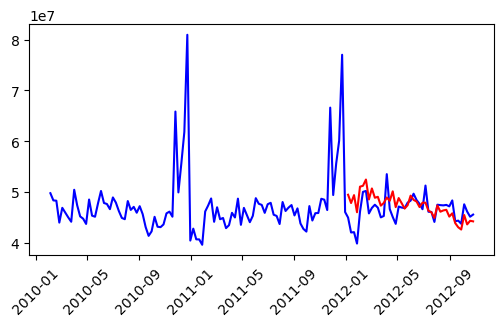

In [202]:
plt.figure(figsize=(6,3)) 

plt.plot( new_data['Weekly_Sales'], color='blue')
plt.plot( new_data['Sarima_Predicted'], color='red')
plt.xticks(rotation=45)
plt.show()

In [108]:
future = model.forecast(steps=55)
print("Forecasted Weekly Sales for the next 12 weeks:")
print(future.tail(12))

Forecasted Weekly Sales for the next 12 weeks:
2012-11-02    4.575298e+07
2012-11-09    4.551310e+07
2012-11-16    4.415825e+07
2012-11-23    5.621986e+07
2012-11-30    4.569667e+07
2012-12-07    4.929167e+07
2012-12-14    5.191657e+07
2012-12-21    6.204544e+07
2012-12-28    4.305538e+07
2013-01-04    4.497664e+07
2013-01-11    4.385153e+07
2013-01-18    4.464253e+07
Freq: W-FRI, Name: predicted_mean, dtype: float64


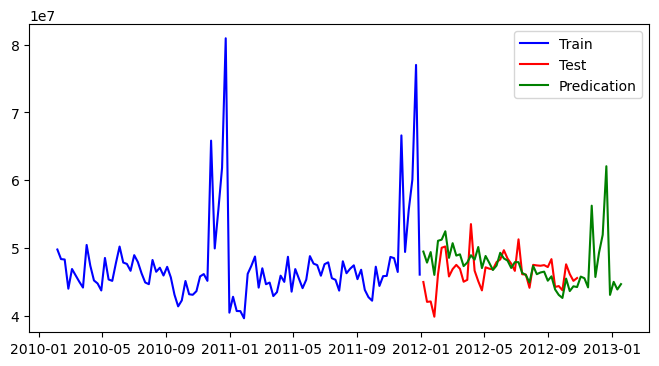

In [109]:
plt.figure(figsize=(8,4))
plt.plot(x_train, color='blue', label='Train')
plt.plot(x_test, color='red', label='Test')
plt.plot(future, color='green', label='Predication')
plt.legend(loc='best')
plt.show()